In [1]:
!pip install alpaca-trade-api

In [8]:
API_KEY = 'PK0U7LODKAYW9OUO936F'
SECRET_TOKEN = 'KyKJjUjZUcOnuhSeaOhh21hcJK0Ddyy55pR9iRfs'
BASE_URL = 'https://paper-api.alpaca.markets'

In [50]:
import alpaca_trade_api as tradeapi

api = tradeapi.REST(
    base_url = BASE_URL,
    key_id = API_KEY,
    secret_key = SECRET_TOKEN
)

account = api.get_account()

In [51]:
if account.trading_blocked:
  print("Your Account is restricted from trading.")

print("${} is available as buying power".format(account.buying_power))

$199420.4 is available as buying power


In [52]:
# Define the stock symbol you want to get details for
symbol = 'AAPL'

# Get the asset object for the stock
asset = api.get_asset(symbol)

# Extract the relevant details from the asset object
name = asset.name
exchange = asset.exchange
status = asset.status
tradable = asset.tradable

# Print the stock details
print(f"Symbol: {symbol}")
print(f"Name: {name}")
print(f"Exchange: {exchange}")
print(f"Status: {status}")
print(f"Tradable: {tradable}")

Symbol: AAPL
Name: Apple Inc. Common Stock
Exchange: NASDAQ
Status: active
Tradable: True


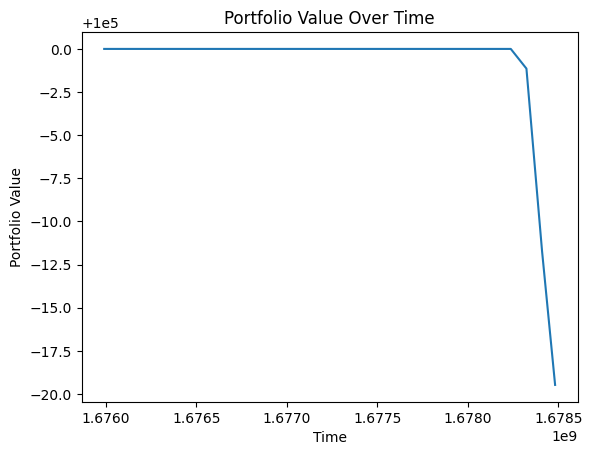

In [53]:
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt

# Set up the Alpaca API client
api = tradeapi.REST(
    base_url = BASE_URL,
    key_id = API_KEY,
    secret_key = SECRET_TOKEN
)

# Get portfolio history for the last 30 days
portfolio_history = api.get_portfolio_history(period='30D')

# Extract the equity value and time periods
equity = portfolio_history.equity
time_periods = portfolio_history.timestamp

# Create a graph using Matplotlib
plt.plot(time_periods, equity)
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

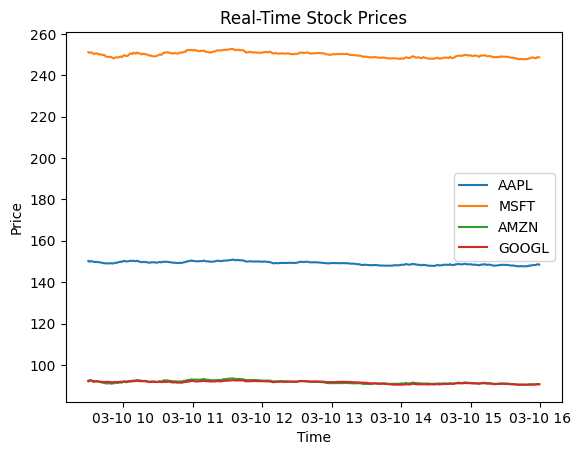

In [66]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers you want to track
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL"]

# Create an empty dictionary to store the stock data
stock_data = {}

# Fetch the stock data and store it in the dictionary
for ticker in tickers:
    stock_data[ticker] = yf.Ticker(ticker).history(period="1d", interval="1m")

# Plot the data for each stock
for ticker in tickers:
    plt.plot(stock_data[ticker]["Close"], label=ticker)

# Set the axis labels and title
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Real-Time Stock Prices")

# Display the legend and show the plot
plt.legend()
plt.show()